# Task-3: CREATE A PREDICTIVE MODEL USING SCIKIT LEARN TO CLASSIFY OR PREDICT OUTCOMES FROM A DATASET (E.G., SPAM EMAIL DETECTION)

## Load and Analyse Dataset (Heart Disease)

In [1]:
import pandas as pd

In [2]:
heart_disease = pd.read_csv("heart.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Attributes meaning
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target = heart disease

In [3]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#Checking for null values
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#checking for duplicates
heart_disease.duplicated().sum()

723

### Since More than 70% of the data is duplicated, I am creating another dataset without duplicates and at the end will choose the best dataset with higher accuracy 

In [6]:
#Dropping duplicates
heart_disease_dup = heart_disease.drop_duplicates(ignore_index = True)
heart_disease_dup #2nd dataset without duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [7]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Visualization of the Dataset - 1 (with duplicates)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

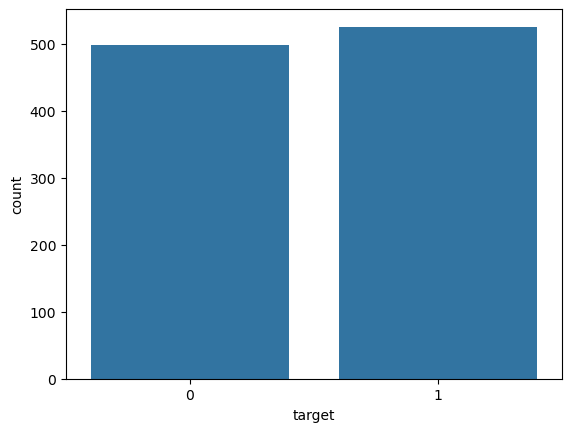

In [9]:
#Countplot to check the target
sns.countplot(x = 'target', data = heart_disease)
plt.show()

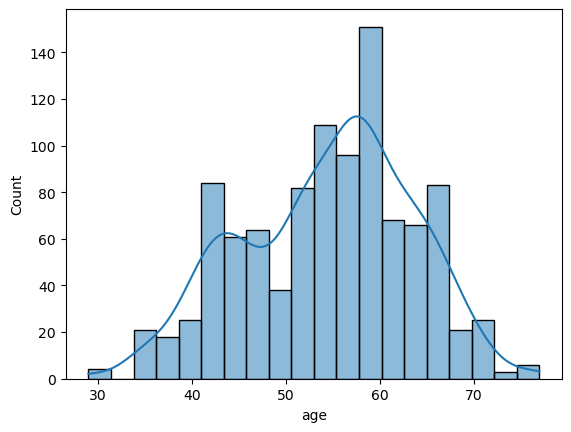

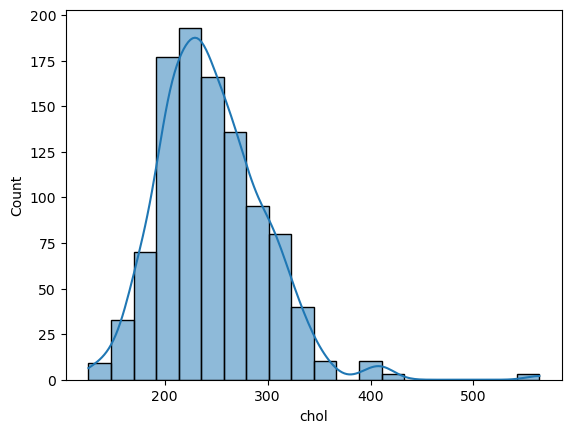

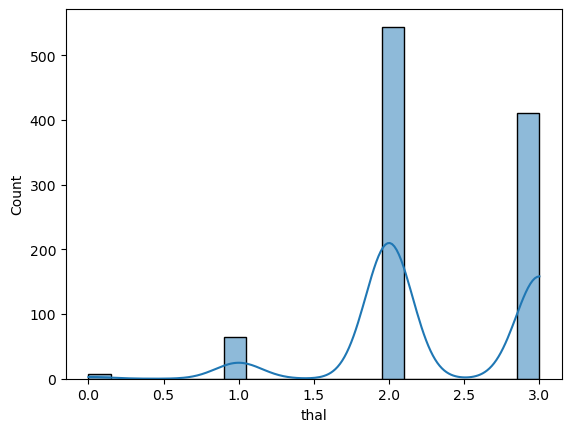

In [10]:
#Histogram for 1.Age 2.Cholesterol 3.thal
#Age
sns.histplot(heart_disease['age'], bins = 20, kde = True)
plt.show()
#Cholesterol
sns.histplot(heart_disease['chol'], bins = 20, kde = True)
plt.show()
#thal
sns.histplot(heart_disease['thal'], bins = 20, kde = True)
plt.show()

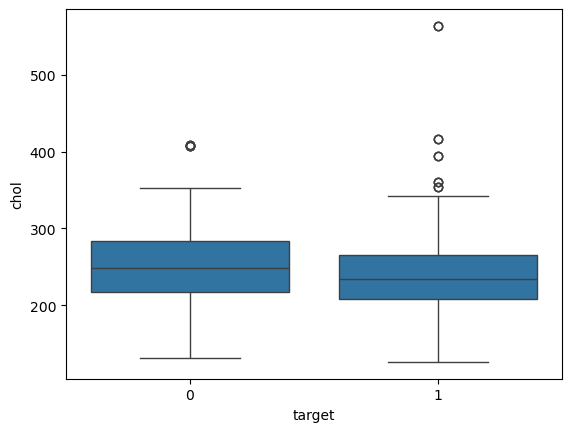

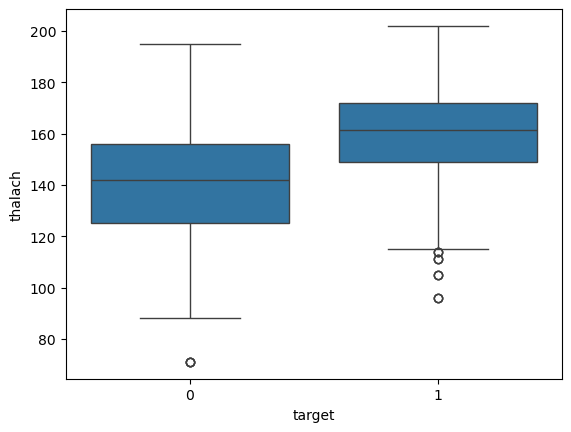

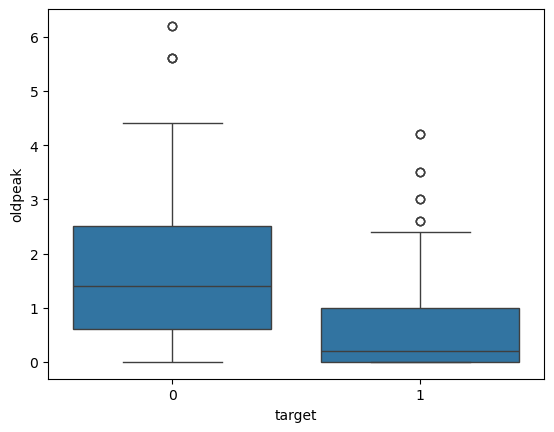

In [11]:
#Boxplot for target V/s 1.chol 2.thalach, oldpeak
#target V/s chol
sns.boxplot(x = 'target', y = 'chol', data = heart_disease)
plt.show()
sns.boxplot(x = 'target', y = 'thalach', data = heart_disease)
plt.show()
sns.boxplot(x = 'target', y = 'oldpeak', data = heart_disease)
plt.show()

## Visualization in the dataset - 2 (without duplicates)

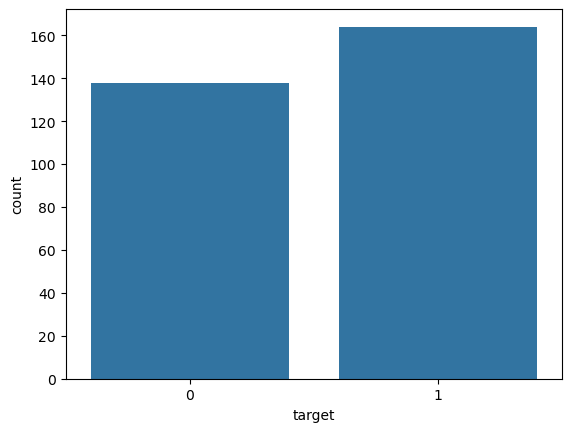

In [12]:
#Countplot to check the target
sns.countplot(x = 'target', data = heart_disease_dup)
plt.show()

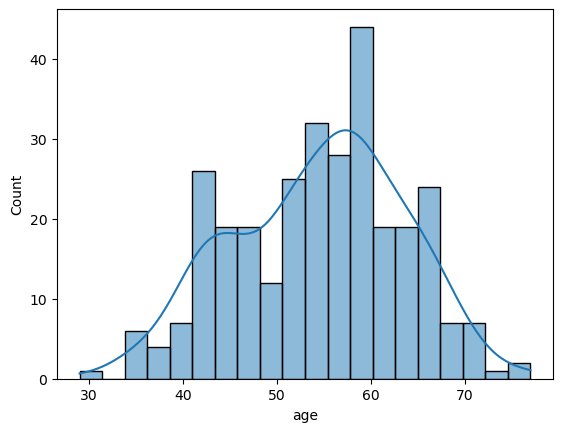

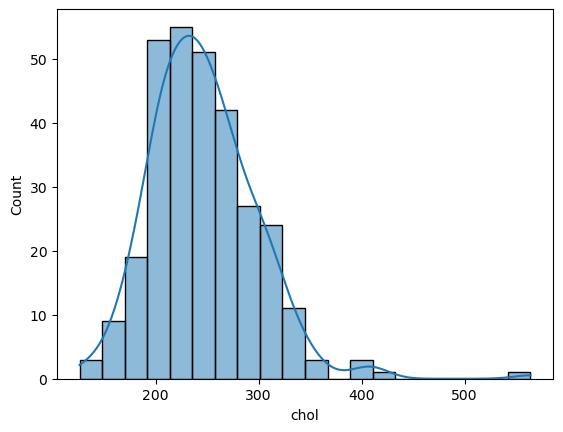

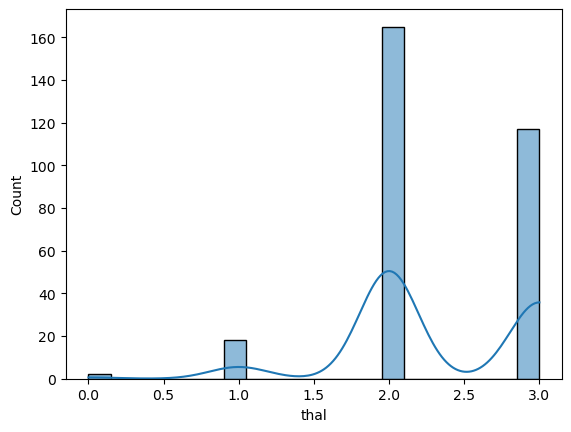

In [13]:
#Histogram for 1.Age 2.Cholesterol 3.thal
#Age
sns.histplot(heart_disease_dup['age'], bins = 20, kde = True)
plt.show()
#Cholesterol
sns.histplot(heart_disease_dup['chol'], bins = 20, kde = True)
plt.show()
#thal
sns.histplot(heart_disease_dup['thal'], bins = 20, kde = True)
plt.show()

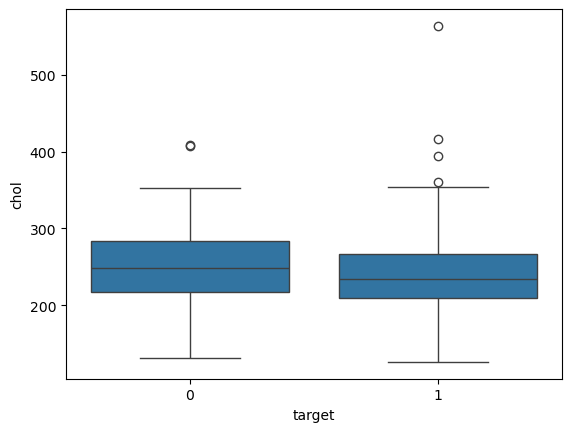

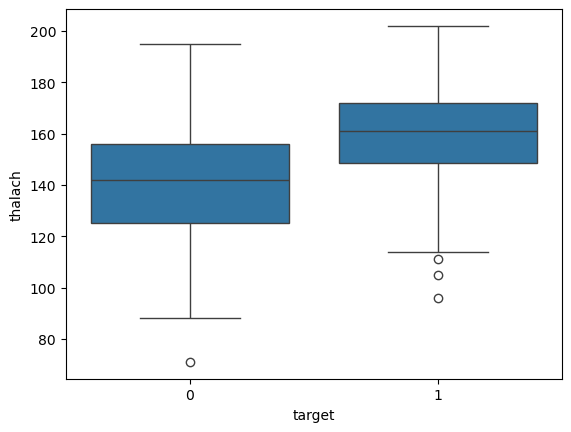

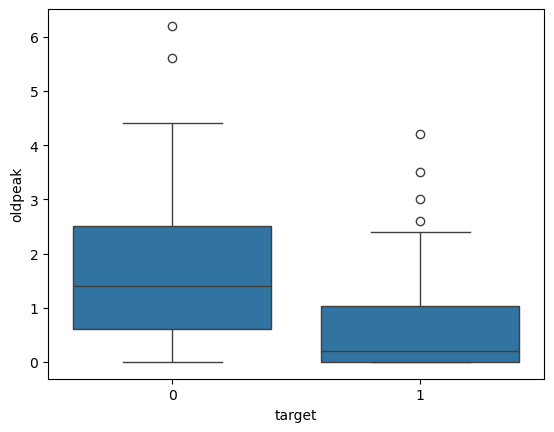

In [14]:
#Boxplot for target V/s 1.chol 2.thalach, oldpeak
#target V/s chol
sns.boxplot(x = 'target', y = 'chol', data = heart_disease_dup)
plt.show()
sns.boxplot(x = 'target', y = 'thalach', data = heart_disease_dup)
plt.show()
sns.boxplot(x = 'target', y = 'oldpeak', data = heart_disease_dup)
plt.show()

## Predictive Model 1 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [25]:
#Splitting the dataset to train and test
X1 = heart_disease.drop('target', axis = 1)
y1 = heart_disease['target']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [26]:
#training and making the model to predict
model = LogisticRegression(max_iter = 1000)
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

In [39]:
#Checking the accuracy_score, precision, recall, F1_score
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



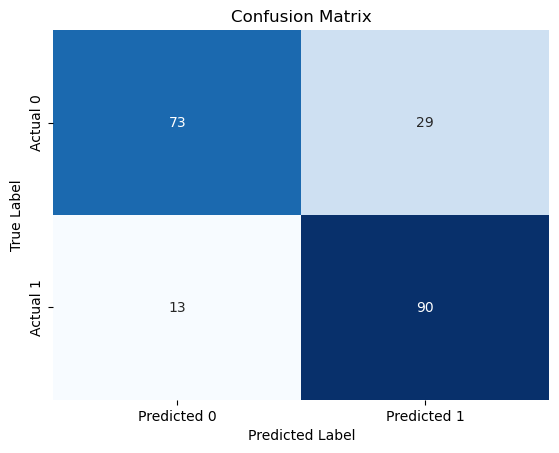

In [42]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Predictive Model 2

In [44]:
#Splitting the dataset to train and test
X2 = heart_disease_dup.drop('target', axis = 1)
y2 = heart_disease_dup['target']

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [49]:
#Training and predicting with the model
model = LogisticRegression(max_iter = 2000)
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)

In [50]:
#Checking the accuracy, precision, recall and f1
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       106
           1       0.79      0.89      0.84        99

    accuracy                           0.83       205
   macro avg       0.84      0.84      0.83       205
weighted avg       0.84      0.83      0.83       205



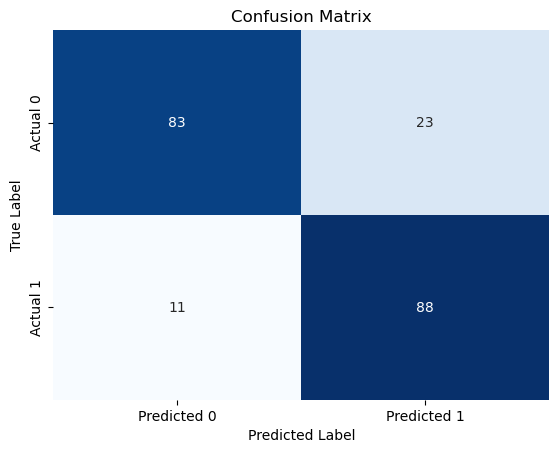

In [52]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y2_test, y2_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Model 1 V/S Model 2
1. Accuracy: 2 > 1
2. Precision: 2 > 1 (for both true +ve and true -ve)
3. Recall : 2 > 1 (for both true +ve and true -ve)
4. F1 Score: 2 > 1 (for both true +ve and true -ve)

* Therefore selecting model 2 to predict for the new datasets

In [55]:
#Creating new dataset
patient_data_dict = {
    'age': [52,65,40],
    'sex': [1,0,1],
    'cp': [1,3,0],
    'trestbps': [130,160,120],
    'chol': [230,300,210],
    'fbs': [0,1,0],
    'restecg': [1,0,1],
    'thalach': [158,115,172],
    'exang': [0,1,0],
    'oldpeak': [1.2,3.5,0.0],
    'slope': [2,2,1],
    'ca': [0,0,2],
    'thal': [2,2,3]
}
patient_data = pd.DataFrame(patient_data_dict)
patient_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,1,130,230,0,1,158,0,1.2,2,0,2
1,65,0,3,160,300,1,0,115,1,3.5,2,0,2
2,40,1,0,120,210,0,1,172,0,0.0,1,2,3


In [71]:
#Predicting the patient has heart disease or not
for i in range(len(patient_data)):
    input_data = patient_data.iloc[[i]]
    
    prediction = model.predict(input_data)[0]
    
    if prediction == 0:
        print(f"Patient {i+1} does not have heart disease")
    else:
        print(f"Patient {i+1} has heart disease")

Patient 1 has heart disease
Patient 2 has heart disease
Patient 3 does not have heart disease
